## Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MaksonViini/Project-Price-houses/main/kc_house_data.csv')

## Analise e transformacao dos dados

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data.shape

(21613, 21)

In [7]:
data.isna().sum().sum()

0

In [8]:
X = data.iloc[:, 5].values
y = data.iloc[:, 2].values

In [9]:
type(X)

numpy.ndarray

## Dividindo os dados entre treino e test

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Criando o Modelo de Regressao Linear

In [12]:
X_train = X_train.reshape(-1, 1)
X_test  = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

In [6]:
from sklearn.linear_model import LinearRegression

In [14]:
# Instanciando a Regressao Linear
lr = LinearRegression().fit(X_train, y_train)

## Metricas e analise do modelo

In [16]:
score = lr.score(X_train, y_train)
print('O Score: ', score)

O Score:  0.4913065705549775


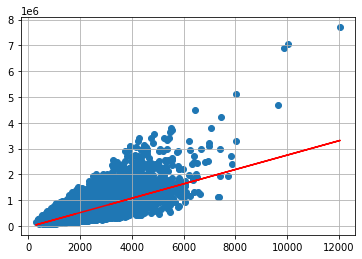

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.grid()
plt.show()

In [31]:
y_pred = lr.predict(X_test)
y_pred

array([[ 536558.50002578],
       [ 767664.44689917],
       [1009908.02976645],
       ...,
       [ 536558.50002578],
       [1285564.52061542],
       [ 439104.18507917]])

In [26]:
y_test

array([[ 365000.],
       [ 865000.],
       [1038000.],
       ...,
       [ 272500.],
       [2250000.],
       [ 330000.]])

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Valores do Mean Absolute Error: ', mae)
print('Valores do Mean Squared Error: ', mse)
print('Valores do Root Mean Squared Error: ', rmse)
print('Valores do R2 score: ', r2)

Valores do Mean Absolute Error:  177572.03896047475
Valores do Mean Squared Error:  75320835437.85425
Valores do Root Mean Squared Error:  274446.41633268644
Valores do R2 score:  0.4964768256677172


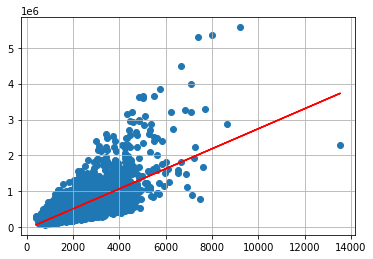

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color='red')
plt.grid()
plt.show()

# Aplicando Regressao multipla

In [21]:
X = data.iloc[:, 3:19]
y = data.iloc[:, 2]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
lr = LinearRegression().fit(X_train, y_train)

## Avaliando o modelo de Regressao Multipla

In [24]:
y_pred = lr.predict(X_test)

In [25]:
score = lr.score(X_train, y_train)
print('Score: ', score.round(3) * 100, '%')

Score:  69.69999999999999 %


In [26]:
# Paramentro B da formula ax+b
# Valor onde a reta inicia
print('Intercepto: ', lr.intercept_)

# Paramentro A da formula ax+b
# Ele aprendeu um coeficiente para cada um dos atributos da base de dados
print('\nCoeficientes: ', lr.coef_)

Intercepto:  8884789.006914787

Coeficientes:  [-3.38151321e+04  4.37804669e+04  1.12739494e+02 -7.19408679e-02
  3.75789223e+03  5.50885821e+05  5.65924236e+04  2.28882091e+04
  9.79770077e+04  7.41922675e+01  3.85472270e+01 -2.66200443e+03
  2.12176668e+01 -5.69585938e+02  6.01109255e+05 -1.87927880e+05]


In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Valores do Mean Absolute Error: ', mae)
print('Valores do Mean Squared Error: ', mse)
print('Valores do Root Mean Squared Error: ', rmse)
print('Valores do R2 score: ', r2)

Valores do Mean Absolute Error:  126842.36660967131
Valores do Mean Squared Error:  44332370771.8665
Valores do Root Mean Squared Error:  210552.53684500337
Valores do R2 score:  0.7036361064377241
